## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("../modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf)

import quadratic_equation as qef
importlib.reload(qef);

2025-04-01 14:00:07.849358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 14:00:07.849796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 14:00:07.942001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 14:00:08.215741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'plotting_functions'

<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Architektura gęsta/w pełni połączona - ang. dense/fully connected, FCN

Standardowa architektura sieci neuronowej to wiele warstw następujących **sekwencyjnie** po sobie.

* warstwy ukryte mają zwykle funkcję aktywacji ReLu:

```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
```

* warstwy wyjściowe mają zwykle funkcję aktywacji:
    * **liniową** - dla zagadnienia regresji:
      <br></br>
      
      ```Python
      tf.keras.layers.Dense(nNeurons, activation="linear", name="layer_{}".format(iLayer))(x)
      ```

     <br></br>
    * **softmax** - dla zagadnienia klasyfikacji:
      <br></br>
      ```Python
       tf.keras.layers.Dense(nNeurons, activation="softmax", name="layer_{}".format(iLayer))(x)
      ```
      <br></br>

Funkcje podawane a konstruktorze można określać, używając nazwy lub podając obiekt funkcji explicite:
```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
tf.keras.layers.Dense(nNeurons, activation=tf.keras.activations.relu, name="layer_{}".format(iLayer))(x)
```

W architekturze gęstej dana warstwa przyjmuje jako wejście wyjście z warstwy poprzedniej. Wyjątkiem jest oczywiście warstwa wejściowa.

Warstwa gęsta, `tf.keras.layers.Dense` przyjmuje wiele argumentów sterujących:
```Python
tf.keras.layers.Dense(
    units,                    # liczba neuronów
    activation=None,          # funkcja aktywacji
    use_bias=True,            # flaga sterująca obecnością wyrazu wolnego: w*x+b
    kernel_initializer='glorot_uniform',# rozkład prawdopodobieństwa dla początkowych wartości wag
    bias_initializer='zeros', # rozkład prawdopodobieństwa dla początkowych wartości wyrazów wolnych
    kernel_regularizer=None,  # funkcja regularyzyjąca wartości wag
    bias_regularizer=None,    # funkcja regularyzyjąca wartości wyrazów wolnych
    activity_regularizer=None,# funkcja regularyzyjąca wartość wyjściową neuronu
    kernel_constraint=None,   # funkcja nakładająca ograniczenia na wartości wag
    bias_constraint=None,     # funkcja nakładająca ograniczenia na wartości wyrazów wolnych
)
```

Sieć neuronowa złożona z 
* warstwy wejściowej przyjmującej `nInputs` zmiennych
* dwu warstw ukrytych o `nNeurons` neuronach (jednostkach)
* warstwy wyjściowej o `nOutputNeurons` neuronach

In [2]:
nInputs = 4
nNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

layer1 = tf.keras.layers.Dense(nNeurons, name="layer_1")(inputs)
layer2 = tf.keras.layers.Dense(nNeurons, name="layer_2")(layer1)
            
outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer2)   

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
tf.keras.utils.plot_model(model, 'fig_png/ML_model.png', show_shapes=True)
model.summary()

2025-03-26 16:25:01.694351: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-26 16:25:01.694478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-03-26 16:25:02.307454: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

Definicję modelu dużo wygodniej jest jednak zadać w pętli.

**Proszę:**

Napisać funkcję `getModel()`, 

```Python
getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1)
```

która przyjmuje następujące argumenty:

* kształt danych wejściowych: `inputShape`
* listę zwierającą liczby neuronów w kolejnych warstwach, włączając warstwę wyjściową: `nNeurons = [64,32,16,8]`
* funkcje aktywacji dla warstw ukrytych i wyjściowej: `hiddenActivation, outputActivation` z odpowiednimi wartościami domyślnymi
* liczbę neuronów wyjściowych: `nOutputNeurons` z domyślną wartością `1`

Następnie proszę zainicjalizować zmienną `model` używając funkcji `getModel()` i wypisać podsumowanie modelu używając metody `summary()` 

In [3]:
#BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):

    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = getModel((128,), [64,32,16,8])
model.summary()
#END_SOLUTION
pass

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* korzystając z funkcji `getModel(...)` zbudować model z jedną warstwą ukrytą o 1024 neuronach i jednej cesze wejściowej
* ustawić inicjalizację wag na gaussowską:
  
```Python
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
  
```
* ustawić inicjalizację wyrazu wolnego według rozkładu płaskiego w zakresie `[-1,1]`:
  
```Python
tf.keras.initializers.RandomUniform(minval=-1, maxval=1)

```

In [4]:
#BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):

    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer=tf.keras.initializers.RandomNormal(),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = getModel((128,), [64,32,16,8])
model.summary()
#END_SOLUTION
pass

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

**Proszę:**

* narysować histogram wartości wag
* narysować histogram wartości wyrazów wolnych

**Wskazówka:** proszę zwrócić uwagę na kształt macierzy wag i wyrazów wolnych przy rysowaniu histogramu

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_0 (Dense)                 │ (None, 1024)           │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

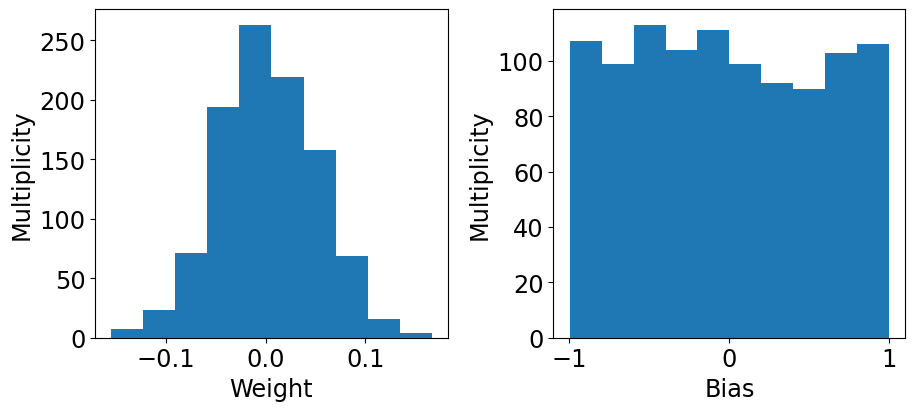

In [5]:
#BEGIN_SOLUTION
model = getModel((1,), [1024])
model.summary()

weights = model.get_layer('layer_0').weights[0].numpy()[0,:]
biases = model.get_layer('layer_0').weights[1].numpy()[:]

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].hist(weights, label="Layer weights");
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Multiplicity')

axes[1].hist(biases, label="Layer biases");
axes[1].set_xlabel('Bias')
axes[1].set_ylabel('Multiplicity')
axes[1].set_xlim([-1.1,1.1])
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

Domyślnie wagi warstwy gęstej są inicjalizowane za pomocą rozkładu płaskiego w zakresie `[-w, w]` gdzie
$$
\Large{
w = \frac{\sqrt{6}}{nInput + nOutput}
}
$$

```Python
tf.keras.initializers.GlorotUniform(seed=None)
```

Inicjalizacja typu Glorot (nazwa on nazwiska osoby, która ją zaproponowała) poprawia zbieżność uczenia. W szczególności redukuje efekty
* **zanikania gradientu** - sieć w pewnym momencie, przestaje się uczyć, pomimo ewidentnego niedopasowania do danych
* **wybuchania gradientu** - w pewnym momencie sieć zaczyna zwracać NaN

W niektórych źródłach dla funkcji aktywacji ReLU jest polecana wersja `He uniform`:

$$
\Large{
w = \frac{\sqrt{6}}{nInput}
}
$$

**Proszę:**

* zdefiniować pojedynczą warstwę o 1 neuronie 
* użyć domyślnej inicjalizacji wag i wyrazu wolnego
* przygotować 10 000 przykładów o 12 losowych cechach danych rozkładem płaskim w zakresie `[0,1]`
* narysować histogram wartości cech wejściowych
* narysować histogram wartości wyjściowej warstwy
* powtórzyć procedurę dla  wykładniczego rozkładu cech

**Pytanie**: dlaczego rozkład wartości warstwy jest, jaki jest?

**Proszę:**
* wykonać rysunku dla cech wejściowych losowanych z rozkładu wykładniczego o "czasie życia" równym `1.0`

Output mean: -0.2678
Output standard deviation: 0.3292
CPU times: user 2.9 s, sys: 107 ms, total: 3.01 s
Wall time: 3.44 s


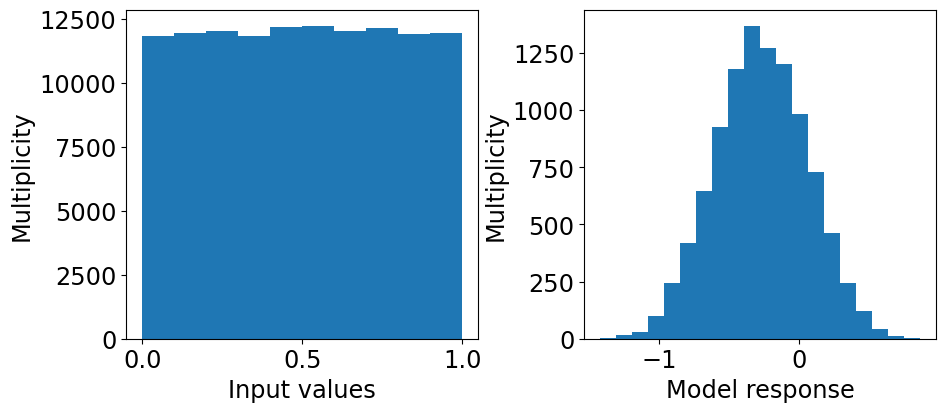

In [6]:
%%time
#BEGIN_SOLUTION
model = tf.keras.layers.Dense(1)
x = np.random.default_rng().uniform(0,1, (10000,12))
#x = np.random.default_rng().exponential(1, (10000,12))
y_pred = model(x)

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].hist(x.flatten());
axes[0].set_xlabel('Input values')
axes[0].set_ylabel('Multiplicity')

axes[1].hist(y_pred[:,0], bins=20);
axes[1].set_xlabel('Model response')
axes[1].set_ylabel('Multiplicity')
#axes[1].set_yscale('log')
print(colored("Output mean:","blue"), "{:3.4f}".format(tf.math.reduce_mean(y_pred)))
print(colored("Output standard deviation:","blue"), "{:3.4f}".format(tf.math.reduce_std(y_pred)))
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

## Rekonstrukcja funkcji schodkowej

**Proszę:**

* wygenerować 256 par $(x,y)$, gdzie:
    * $x$ - liczby losowe zadane rozkładem płaskim w zakresie $[0,1]$
    * 
    $$
    \huge{
    y = 
    \begin{cases}
      1 & \text{gdy x>0 i x<0.5} \\
      0 & \text{w każdym innym przypadku}
      \end{cases}
    }
    $$
 
* podzielić dane na dwa równe zbiory: treningowy i walidacyjny
* ze zbioru **walidacyjnego** usunąć punkty na schodku: `|x-0.5|<0.01`

In [7]:
#BEGIN_SOLUTION
#data creation
nPoints = 256
x = np.random.default_rng().uniform(0,1, (nPoints,1))
y = (x>0)*(x<0.5)
y = y.astype(np.float64)
nHalf = int(nPoints/2)
x_train, y_train = x[:nHalf,:], y[:nHalf,:]
x_val, y_val = x[nHalf:,:], y[nHalf:,:]
mask = np.abs(x_val-0.5)>1E-2
x_val = x_val[mask].reshape(-1,1)
y_val = y_val[mask].reshape(-1,1)

print(colored("Training data shape:","blue"),x_train.shape, y_train.shape)
print(colored("Validation data shape:","blue"),x_train.shape, y_train.shape)     
#END_SOLUTION
pass

Training data shape: (128, 1) (128, 1)
Validation data shape: (128, 1) (128, 1)


**Proszę:**

* zdefiniować i wytrenować sieć neuronową, która odtwarza zależność `y(x)`
* używając funkcji `plotHistory()` z modułu `plotting_functions` narysować ewolucję funkcji straty na zbiorach testowym i walidacyjnym

I0000 00:00:1743002708.501929 3194147 service.cc:145] XLA service 0x7c25bc00f470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743002708.501945 3194147 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
I0000 00:00:1743002708.501947 3194147 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-03-26 16:25:08.541692: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-26 16:25:08.767187: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1743002709.421977 3194147 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


CPU times: user 1min 13s, sys: 7.89 s, total: 1min 21s
Wall time: 1min 12s


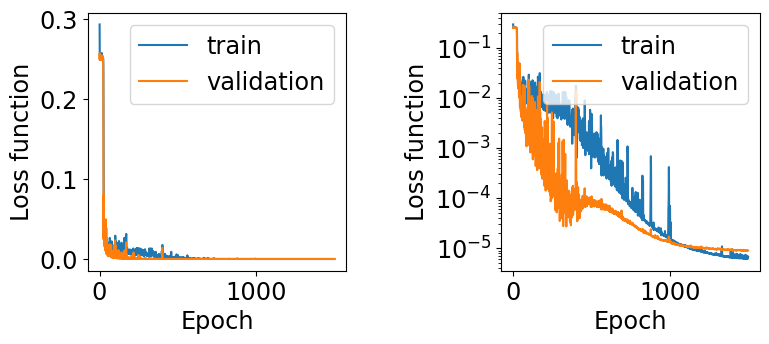

In [8]:
%%time 
#BEGIN_SOLUTION

#model definition
inputShape = (1,)
nNeurons = np.full((8,), 32)
model = getModel(inputShape, nNeurons)

initial_learning_rate = 1E-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss=tf.keras.losses.MeanSquaredError())
                  
#trainining
nEpochs = 1500
history = model.fit(x=x_train, y=y_train, 
                    epochs=nEpochs, 
                    batch_size = 8,
                    validation_data=(x_val, y_val),
                    verbose=0)
plf.plotTrainHistory(history)
#END_SOLUTION
pass

**Proszę:**

* narysować punkty `danych` i wynik modelu na zbiorze treningowym
* narysować punkty `danych` i wynik modelu na zbiorze walidacyjnym
* modyfikując parametry sieci znaleźć model, który na zbiorze walidacyjnym uzyska precyzję lepszą niż $10^{-2}$, gdzie precyzja jest zdefiniowana jako: 
$$
\huge{
\delta = \max{|f(x) - Y|}
}
$$

**Wskazówka:** proszę eksperymentować z liczbą warstw, liczbą neuronów, parametrem uczenia, funkcją aktywacji itd.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
Delta on training set: 0.0116
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Delta on validation set: 0.0069
CPU times: user 396 ms, sys: 21.8 ms, total: 418 ms
Wall time: 480 ms


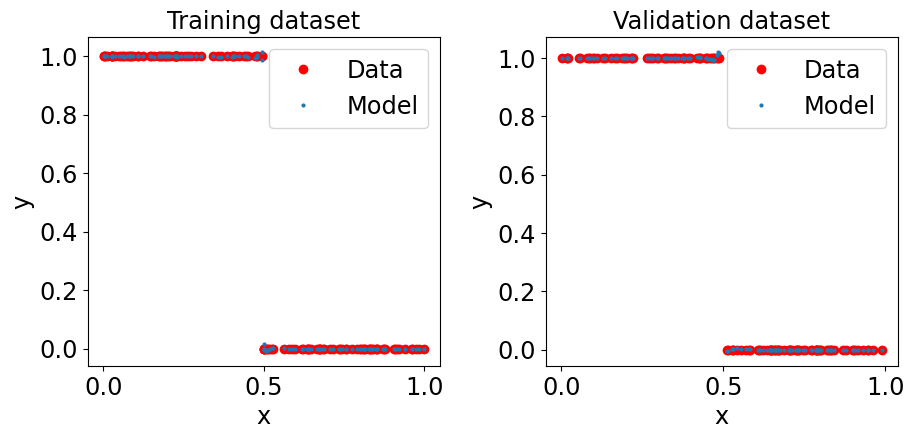

In [9]:
%%time 
#BEGIN_SOLUTION
y_pred = model.predict(x_train)
delta = np.max(y_train - y_pred)
print(colored("Delta on training set:","blue"), "{:3.4f}".format(delta))

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].plot(x_train,y_train,"o", color="red", label="Data");
axes[0].plot(x_train,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("Training dataset")
axes[0].legend();

#evaluation on validation dataset
y_pred = model.predict(x_val)
delta = np.max(y_val - y_pred)
print(colored("Delta on validation set:","blue"), "{:3.4f}".format(delta))

axes[1].plot(x_val,y_val,"o", color="red", label="Data");
axes[1].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("Validation dataset")
axes[1].legend();

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

**Proszę:**

* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru przed schodkiem: x$\in$[0.41, 0.51], y$\in$[0.99, 1.01]
* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru za schodkiem: x$\in$[0.49, 0.61], y$\in$[-0.01, 0.01]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


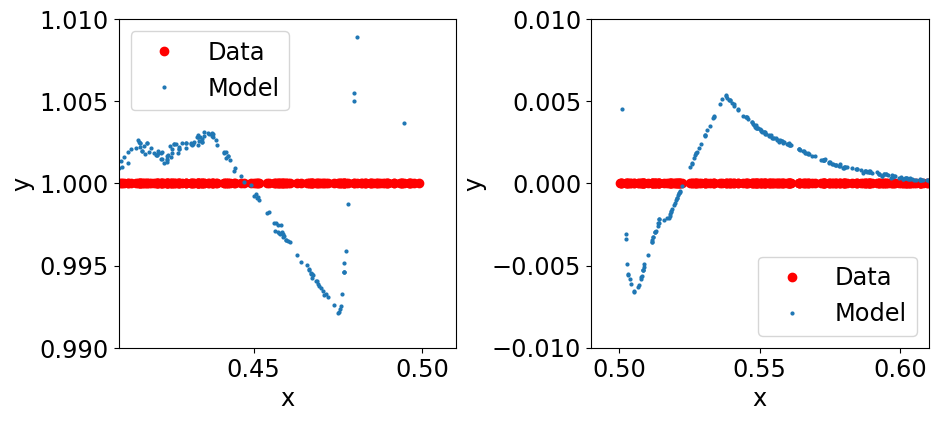

In [10]:
#BEGIN_SOLUTION
fig, axes = plt.subplots(1, 2, figsize=(9,4.5))

x_val = np.random.default_rng().uniform(0,1, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

axes[0].plot(x_val,y_val,"o", color="red", label="Data");
axes[0].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim([0.41, 0.51])
axes[0].set_ylim([0.99, 1.01])
axes[0].legend();

axes[1].plot(x_val,y_val,"o", color="red", label="Data");
axes[1].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_xlim([0.49, 0.61])
axes[1].set_ylim([-0.01, 0.01])
axes[1].legend();

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.4)
#END_SOLUTION
pass

**Proszę:**

* narysować dane i odpowiedź modelu w zakresie poza obszarem użytym do treningu: x$\in$[-5,5] 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


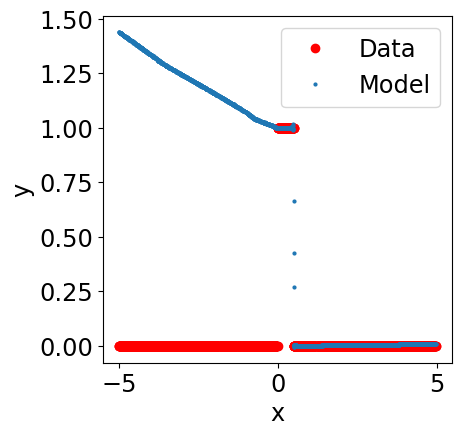

In [11]:
#BEGIN_SOLUTION
x_val = np.random.default_rng().uniform(-5,5, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

fig, axes = plt.subplots(1, 1, figsize=(4.5,4.5))
axes.plot(x_val,y_val,"o", color="red", label="Data");
axes.plot(x_val,y_pred,"o", markersize=2, label="Model")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend();
#END_SOLUTION
pass

## Sieć rozwiązująca równane kwadratowe.

**Proszę:**

Korzystając z rozwiązania zadania domowego przygotować zbiór danych dotyczących rozwiązywania równania kwadratowego:

* x - współczynniki równania w zakresie [-1,1]$^{3}$
* y - rozwiązywalność równania: `True/False`.
* ustawić kształt zmiennej `y` na `(-1,1)`
* użyć po 1000 przykładów zbioru uczącego i 10000 dla walidacyjnego
* wypisać na ekran kształty danych. 

In [12]:
#BEGIN_SOLUTION
nSamples = 1000
x_train = qef.quadraticEqGenerator(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

nSamples = 10000
x_val = qef.quadraticEqGenerator(nSamples)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)
#END_SOLUTION
print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

Training data shapes:  (1000, 3) (1000, 1)
Validation data shapes:  (10000, 3) (10000, 1)


**Proszę:**

* wytrenować sieć, która odpowiada na pytanie: **Czy równanie ma rozwiązania?**
* spróbować uzyskać na zbiorze walidacyjnym poprawną odpowiedź w >99% przypadków
* kod trenujący powinien być zawarty w funkcji `quadraticEqMLSolver(x_train, y_train, x_val, y_val)` i zawierać:
    * definicję modelu - z użyciem funkcji `getModel(...)`
    * harmonogram zmiany współczynika uczenia
    * trening **bez** wywołania wczesnego zatrzymania, ale z definicją odpowiednich metryk:
    ```Python
    
    metrics=['Accuracy','FalsePositives']
    ```
    <br></br>
    * rysowane historii funkcji straty
    * wypisanie dokładności, `accuracy` i `false positive rate` obliczonych na zbiorze walidacyjnym z użyciem metody `evaluate`:
      ```Python
      
      model.evaluate(x_train, y_train)
      model.evaluate(x_val, y_val)
      ```
      <br></br>
* funkcja `quadraticEqMLSolver(x_train, y_train, x_val, y_val)` powinna zwracać wytrenowany model

**Wskazówka:** jaka powinna być funkcja aktywacji neuronu wyjściowego?  